`참고: 덕성여대 Nano-degree 교과 <언어 빅데이터 이해와 활용>,<언어 빅데이터>`

```
참고문헌:
Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.".
이기창. 한국어 임베딩. 에이콘.
```
https://www.nltk.org/book/

### konlpy와 mecab을 사용하기 위한 패키지 설치 및 데이터 로드

In [ ]:
! pip install konlpy

# google colab에서 mecab을 사용하기 편하게 만들어주는 shell 파일도 실행시켜 줍니다.
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
! bash ./Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 27.4 MB/s eta 0:00:00
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-03-24 17:22:31--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 

In [ ]:
# 혐오발언 말뭉치 다운로드
! git clone https://github.com/sgunderscore/hatescore-korean-hate-speech.git

Cloning into 'hatescore-korean-hate-speech'...
remote: Enumerating objects: 189, done.
remote: Total 189 (delta 0), reused 0 (delta 0), pack-reused 189
Receiving objects: 100% (189/189), 1.45 MiB | 6.01 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('hatescore-korean-hate-speech/HateScore.csv', index_col=0)

In [ ]:
df.tail()

,comment,macrolabel,microlabel,source
11103,안녕하세요 이란에서 태어난 사람인가?,Clean,None,규칙 기반 생성
11104,트랜스젠더인 거 같네,Clean,None,규칙 기반 생성
11105,저 분은 리비아 친구 처음 만나네,Clean,None,규칙 기반 생성
11106,쟤는 독일 사람 처음 만나네,Clean,None,규칙 기반 생성
11107,그는 독일에서 온 사람 처음 만나네,Clean,None,규칙 기반 생성


## 1. 전처리 (토큰화)

In [ ]:
from konlpy.tag import Okt, Komoran, Mecab, Hannanum, Kkma

In [ ]:
# 토크나이저 로드
tokenizer = Mecab()

In [ ]:
# 'comment' 열에 대해 배치 토크나이징 수행 - 역시 메모리 부족
# java.lang.OutOfMemoryError
df['tokenized'] = df['comment'].apply(lambda x: tokenizer.pos(x))

In [ ]:
df.tail()

,comment,macrolabel,microlabel,source,tokenized
11103,안녕하세요 이란에서 태어난 사람인가?,Clean,None,규칙 기반 생성,"[(안녕, NNG), (하, XSV), (세요, EP+EF), (이란, NNP), ..."
11104,트랜스젠더인 거 같네,Clean,None,규칙 기반 생성,"[(트랜스젠더, NNP), (인, VCP+ETM), (거, NNB), (같, VA)..."
11105,저 분은 리비아 친구 처음 만나네,Clean,None,규칙 기반 생성,"[(저, MM), (분, NNB), (은, JX), (리비아, NNP), (친구, ..."
11106,쟤는 독일 사람 처음 만나네,Clean,None,규칙 기반 생성,"[(쟤, NP), (는, JX), (독일, NNP), (사람, NNG), (처음, ..."
11107,그는 독일에서 온 사람 처음 만나네,Clean,None,규칙 기반 생성,"[(그, NP), (는, JX), (독일, NNP), (에서, JKB), (온, V..."


In [ ]:
df.head()

,comment,macrolabel,microlabel,source,tokenized
0,절라남도 벌레?,혐오발언,지역,온라인 댓글,"[(절, VV), (라, EC), (남, NNG), (도, JX), (벌레, NNG..."
1,부산에서 학식먹었는데 mt 동기mt 동아리mt 단한번도 해운대 안감 부산 현지인들이...,혐오발언,지역,온라인 댓글,"[(부산, NNP), (에서, JKB), (학식, NNG), (먹, VV), (었,..."
2,쌍도 여혐끝판왕의성지,혐오발언,지역,온라인 댓글,"[(쌍도, NNG), (여혐, NNG), (끝판, NNG), (왕, NNG), (의..."
3,제목보고 전라도 직감,혐오발언,지역,온라인 댓글,"[(제목, NNG), (보, VV), (고, EC), (전라도, NNP), (직감,..."
4,홍어지 병신아 ㅋㅋㅋ,혐오발언,지역,온라인 댓글,"[(홍어, NNG), (지, VCP+EC), (병신, NNG), (아, IC), (..."


In [ ]:
df['tokenized']

0        [(절, VV), (라, EC), (남, NNG), (도, JX), (벌레, NNG...
1        [(부산, NNP), (에서, JKB), (학식, NNG), (먹, VV), (었,...
2        [(쌍도, NNG), (여혐, NNG), (끝판, NNG), (왕, NNG), (의...
3        [(제목, NNG), (보, VV), (고, EC), (전라도, NNP), (직감,...
4        [(홍어, NNG), (지, VCP+EC), (병신, NNG), (아, IC), (...
                               ...                        
11103    [(안녕, NNG), (하, XSV), (세요, EP+EF), (이란, NNP), ...
11104    [(트랜스젠더, NNP), (인, VCP+ETM), (거, NNB), (같, VA)...
11105    [(저, MM), (분, NNB), (은, JX), (리비아, NNP), (친구, ...
11106    [(쟤, NP), (는, JX), (독일, NNP), (사람, NNG), (처음, ...
11107    [(그, NP), (는, JX), (독일, NNP), (에서, JKB), (온, V...
Name: tokenized, Length: 11108, dtype: object

In [ ]:
print(df['macrolabel'].unique())
print(df['microlabel'].unique())

['혐오발언' '단순 악플' 'Clean']
['지역' '종교, 지역' '종교' '인종/국적, 지역' '인종/국적, 종교' '인종/국적' '연령, 지역'
 '연령, 인종/국적, 지역' '연령, 인종/국적, 종교' '연령' '여성/가족, 지역' '여성/가족, 종교'
 '여성/가족, 인종/국적' '여성/가족, 연령, 지역' '여성/가족, 연령, 인종/국적' '여성/가족, 연령' '여성/가족'
 '성소수자, 지역' '성소수자, 종교' '성소수자, 여성/가족' '성소수자' '단순 악플, 지역' '단순 악플, 종교, 지역'
 '단순 악플, 종교' '단순 악플, 인종/국적' '단순 악플, 연령, 지역' '단순 악플, 연령' '단순 악플' '남성, 지역'
 '남성, 인종/국적' '남성, 연령' '남성, 여성/가족, 지역' '남성, 단순 악플, 지역' '남성, 단순 악플' '남성'
 '기타 혐오, 지역' '기타 혐오, 인종/국적' '기타 혐오, 연령' '기타 혐오, 여성/가족'
 '기타 혐오, 남성, 성소수자, 여성/가족' '기타 혐오, 남성, 단순 악플' '기타 혐오, 남성' '기타 혐오' 'None']


## 2. 유형 말뭉치 구축 -  `microlabel` 별로 텍스트 분류하기
* 혐오발언 유형 (7가지) : 여성, 성소수자, 지역, 인종/국적, 종교, 연령, 남성

In [ ]:
basic_types = ['여성/가족', '성소수자', '지역', '인종/국적', '종교', '연령', '남성']    # 여성/가족, 종교

* 중복 유형의 경우, 첫 번째로 매치되는 유형을 대표 유형으로 삼기로 한다

In [ ]:
def find_basic_type(label, types):
    labels = label.split(',')
    labels = [lbl.strip() for lbl in labels]
    # 7가지 기본 유형 중에서 첫 번째 것을 리턴
    for t in types:
        if t in labels:
            return t
    return '기타'  # 어디에도 속하지 않는 경우

In [ ]:
find_basic_type('기타 혐오, 남성, 성소수자, 여성/가족', basic_types)

'여성/가족'

* 총 7개의 유형별로, 각각의 파일에 저장하자

In [ ]:
files = {}
for t in basic_types + ['기타']:
  # 인종/국적, 여성/가족 은 특수문자 / 때문에 에러남. 이를 _로 바꿔주기
  t = t.replace('/', '_')
  # files 딕셔너리에 유형별 파일명 담아주기
  files[t] = open(f"doc_{t}.txt", 'w', encoding='utf-8')

* 이제 DF의 각 행을 살펴보면서, 7가지 유형에 따라, 댓글을 배분하고, 토크나이징 하자

In [ ]:
for index, row in df.iterrows():
    # 2개 이상의 유형에서 하나 고르기
    category = find_basic_type(row['microlabel'],basic_types)
    category = category.replace('/', '_')
    # 토크나이징
    tokenized = tokenizer.pos(row['comment'])
    # 형식 변환 [(w1,t1), (w2,t2), ... ] -> 'w1/t1 w2/t2 ...'
    tagged_sent = ' '.join(list('/'.join(wt) for wt in tokenized ) )
    # 유형별로 파일에 쓰기
    files[category].write(tagged_sent + '\n')

* 작업이 모두 끝나면, 파일을 닫는다

In [ ]:
# 파일 핸들 닫기
for file in files.values():
    file.close()

### 3.3 유형 말뭉치 리더(CategorizedTaggedCorpusReader)

In [ ]:
from nltk.corpus.reader import CategorizedTaggedCorpusReader

* arg `cat_pattern` : 유형의 명칭으로 삼을 문자열을 정규표현식의 하위범주화`()`로 지정한다.

In [ ]:
# 말뭉치 초기화
reader = CategorizedTaggedCorpusReader('.', r'doc_\w+\.txt', cat_pattern=r'doc_(\w+)\.txt')

In [ ]:
# 말뭉치의 유형 보이기
reader.categories()

['기타', '남성', '성소수자', '여성_가족', '연령', '인종_국적', '종교', '지역']

위의 categories 메소드는 아래에서 이미 사용한 적이 있습니다
* 예제 1, (Q2) `nltk.corpus.brown.categories()`의 15가지 장르별 텍스트에 대하여, 각각의 어휘 다양성 점수(TTR의 역수)를 구하세요
* 위의 브라운 코퍼스 `nltk.corpus.brown` 는 `CategorizedPlaintextCorpusReader`의 인스턴스임

In [ ]:
# 남성 혐오의 단어 빈도표 만들기
from nltk.probability import FreqDist
man_dist = FreqDist(reader.words(categories='남성'))
man_dist.most_common(20)

[('노', 19),
 ('는', 17),
 ('이', 14),
 ('.', 14),
 ('들', 13),
 ('하', 11),
 ('다', 10),
 ('좆', 10),
 ('고', 10),
 ('한', 9),
 ('은', 8),
 ('가', 7),
 ('거', 7),
 ('에', 7),
 ('이기', 7),
 ('남자', 6),
 ('팔', 6),
 ('놈', 5),
 ('나', 5),
 ('지', 5)]

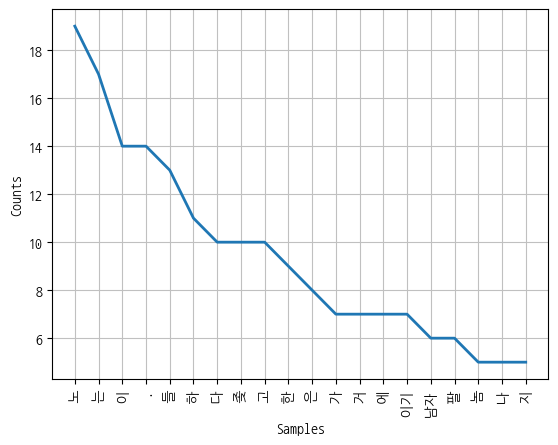

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
man_dist.plot(20)

In [ ]:
# 여성 혐오의 단어 빈도표 만들기
woman_dist = FreqDist(reader.words(categories='여성_가족'))
woman_dist.most_common(20)

[('이', 95),
 ('는', 80),
 ('들', 80),
 ('하', 72),
 ('은', 60),
 ('.', 58),
 ('고', 54),
 ('가', 41),
 ('다', 33),
 ('에', 31),
 ('한', 28),
 ('?', 28),
 ('게', 28),
 ('여자', 27),
 ('도', 27),
 ('ㅋㅋ', 27),
 ('면', 26),
 ('년', 25),
 ('거', 23),
 ('지', 21)]

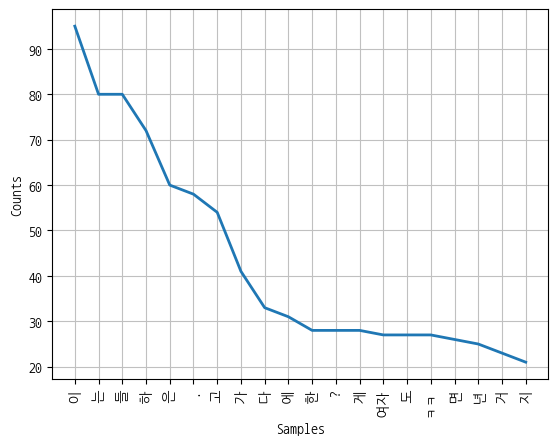

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
woman_dist.plot(20)

In [ ]:
etc_dist = FreqDist(reader.words(categories='기타'))
etc_dist.most_common(20)

[('는', 5922),
 ('이', 4300),
 ('은', 4004),
 ('다', 3988),
 ('사람', 3916),
 ('하', 3567),
 ('에서', 3089),
 ('.', 2962),
 ('을', 2425),
 (',', 2297),
 ('에', 2096),
 ('의', 2039),
 ('인', 1949),
 ('?', 1885),
 ('고', 1538),
 ('출신', 1483),
 ('저', 1469),
 ('온', 1454),
 ('분', 1386),
 ('있', 1329)]

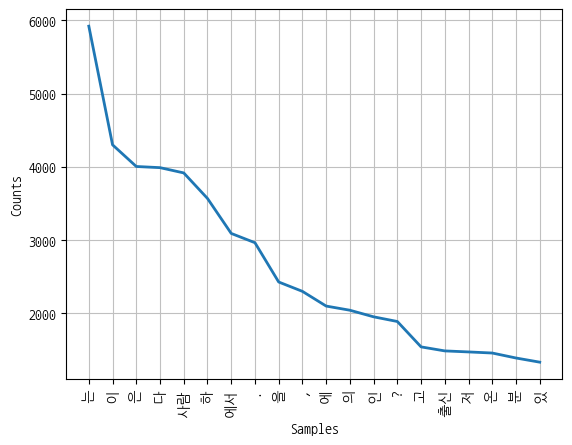

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
etc_dist.plot(20)

In [ ]:
def TTR(words):
  tokens = len(words)
  types = len(set(words))
  return types / tokens

In [ ]:
# 7가지 유형별로 타입-토큰 비율(TTR)을 구하세요
for category in reader.categories():
    print(category, " : ", TTR(reader.words(categories=category)))

기타  :  0.06693578074818793
남성  :  0.5363214837712519
성소수자  :  0.3063063063063063
여성_가족  :  0.36450187011220675
연령  :  0.46893123446561724
인종_국적  :  0.45016077170418006
종교  :  0.4630314232902033
지역  :  0.2590920185501587


In [ ]:
TTR(reader.words(categories='여성_가족'))

0.36450187011220675

In [ ]:
TTR(reader.words(categories='남성'))

0.5363214837712519

## 한글 깨짐 현상 해결

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (42.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and direc

In [ ]:
# 세션 재실행
import matplotlib.font_manager as fm

[f.name for f in fm.fontManager.ttflist]

['DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmtt10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'cmr10',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'cmss10',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Sans',
 'cmmi10',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'cmex10',
 'DejaVu Sans',
 'Liberation Mono',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'NanumSquareRound',
 'NanumSquareRound',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumGothic',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Sans Narrow',
 

In [ ]:
from matplotlib import rc

rc('font', family='NanumGothicCoding')

## (Q1) 1음절 단어를 제외한 단어 빈도표(FreqDist)를 만들어 봅시다

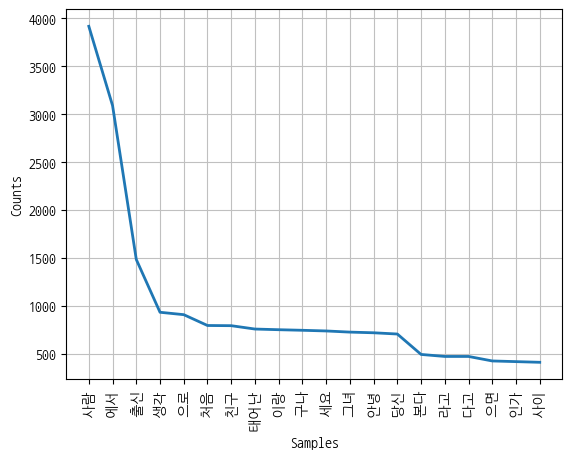

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
from nltk.probability import FreqDist

etc_words = reader.words(categories='기타')
long_etc_words = [w for w in etc_words if len(w) > 1]
etc_word_dist = FreqDist(long_etc_words)
etc_word_dist.plot(20)

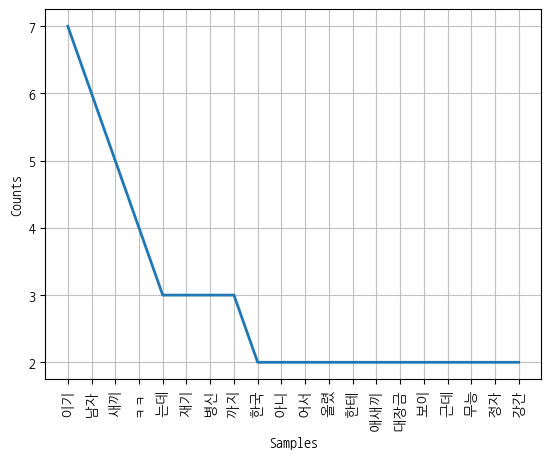

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
man_words = reader.words(categories='남성')
long_man_words = [w for w in man_words if len(w) > 1]
man_word_dist = FreqDist(long_man_words)
man_word_dist.plot(20)

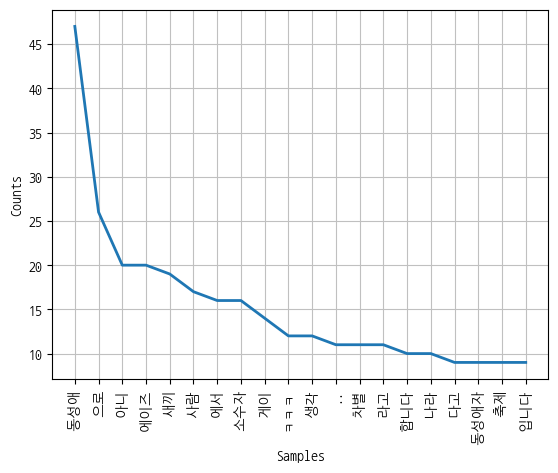

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
queer_words = reader.words(categories='성소수자')
long_queer_words = [w for w in queer_words if len(w) > 1]
queer_word_dist = FreqDist(long_queer_words)
queer_word_dist.plot(20)

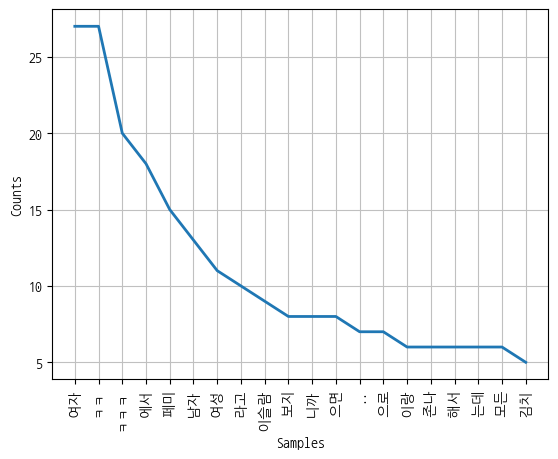

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
woman_words = reader.words(categories='여성_가족')
long_woman_words = [w for w in woman_words if len(w) > 1]
woman_word_dist = FreqDist(long_woman_words)
woman_word_dist.plot(20)

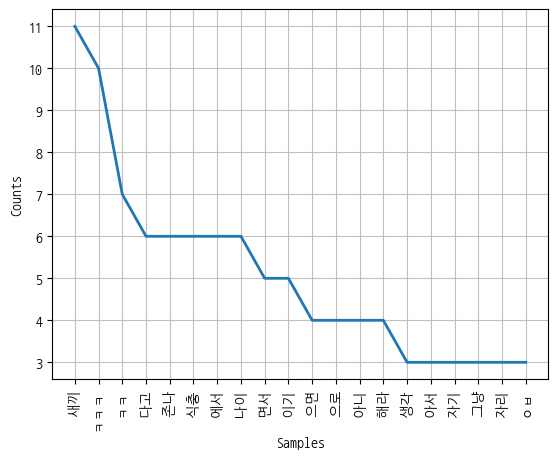

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
age_words = reader.words(categories='연령')
long_age_words = [w for w in age_words if len(w) > 1]
age_word_dist = FreqDist(long_age_words)
age_word_dist.plot(20)

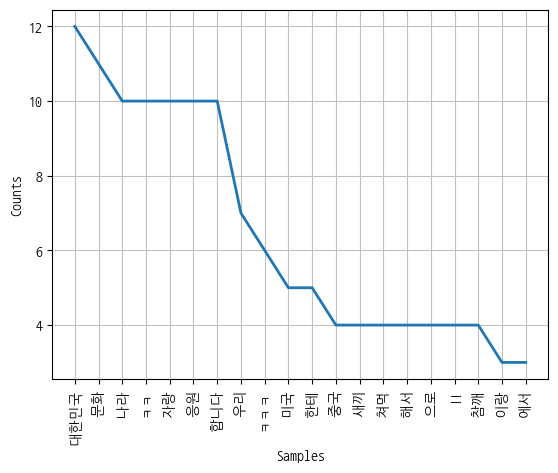

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
race_words = reader.words(categories='인종_국적')
long_race_words = [w for w in race_words if len(w) > 1]
race_word_dist = FreqDist(long_race_words)
race_word_dist.plot(20)

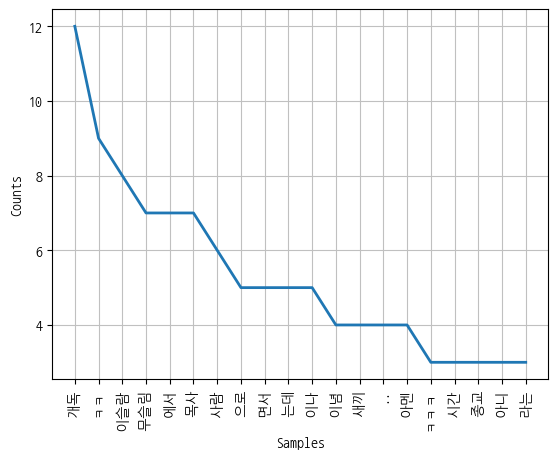

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
religion_words = reader.words(categories='종교')
long_religion_words = [w for w in religion_words if len(w) > 1]
religion_word_dist = FreqDist(long_religion_words)
religion_word_dist.plot(20)

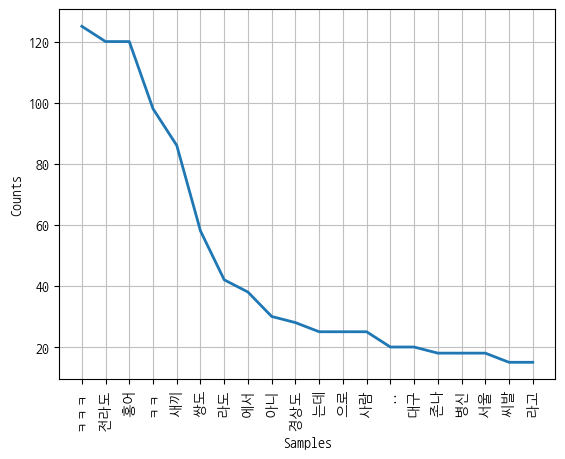

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
region_words = reader.words(categories='지역')
long_region_words = [w for w in region_words if len(w) > 1]
region_word_dist = FreqDist(long_region_words)
region_word_dist.plot(20)

## (Q2) **명사**만으로 이루어진 단어 빈도표를 만들어 봅시다

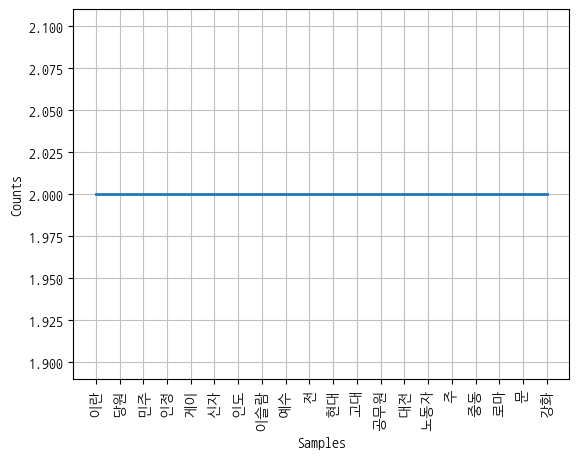

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 여성/가족 혐오 명사 단어
# 남성 혐오 명사
from nltk.probability import FreqDist

etc_dist = FreqDist(reader.tagged_words(categories='기타'))
etc_words = [w for (w, p) in etc_dist if p in ['NNG', 'NNP']]
etc_word_dist = FreqDist(etc_words)
etc_word_dist.plot(20)

In [ ]:
etc_dist = FreqDist(reader.tagged_words(categories='기타'))
etc_words = [w for (w, p) in etc_dist if p.startswith('N') & len(w) > 1]
etc_word_dist = FreqDist(etc_words)
etc_word_dist.plot(20)

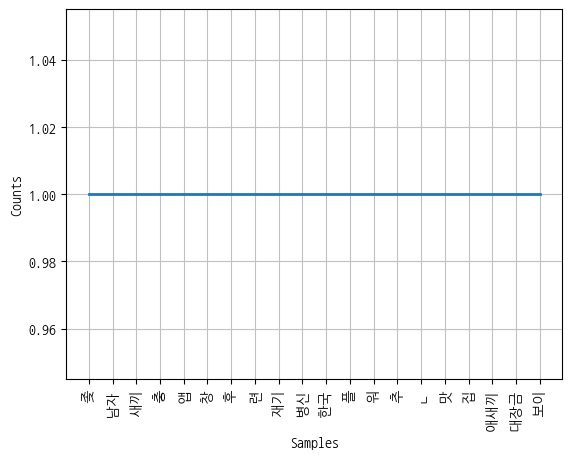

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
man_dist = FreqDist(reader.tagged_words(categories='남성'))
man_words = [w for (w, p) in man_dist if p in ['NNG', 'NNP']]
man_word_dist = FreqDist(man_words)
man_word_dist.plot(20)

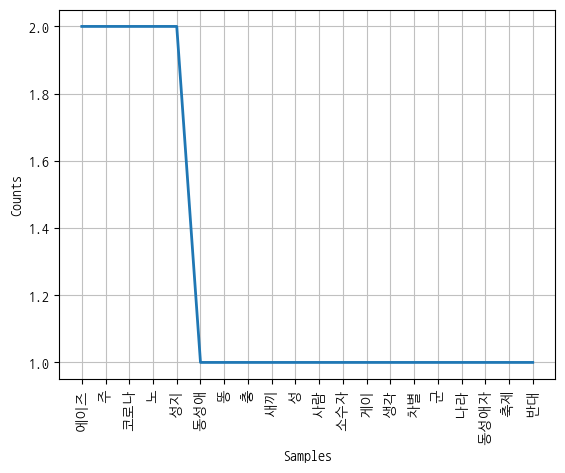

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
queer_dist = FreqDist(reader.tagged_words(categories='성소수자'))
queer_words = [w for (w, p) in queer_dist if p in ['NNG', 'NNP']]
queer_word_dist = FreqDist(queer_words)
queer_word_dist.plot(20)

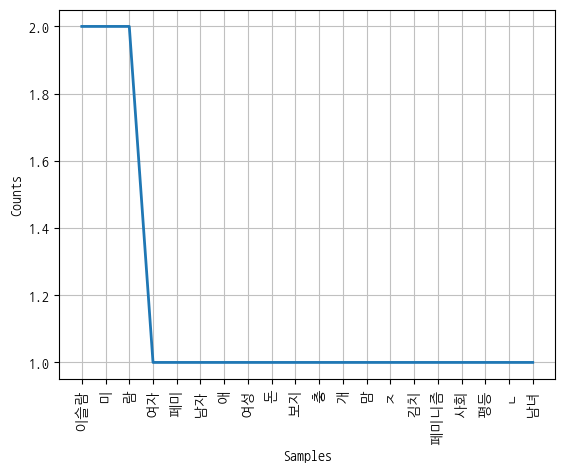

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
woman_dist = FreqDist(reader.tagged_words(categories='여성_가족'))
woman_words = [w for (w, p) in woman_dist if p in ['NNG', 'NNP']]
woman_word_dist = FreqDist(woman_words)
woman_word_dist.plot(20)

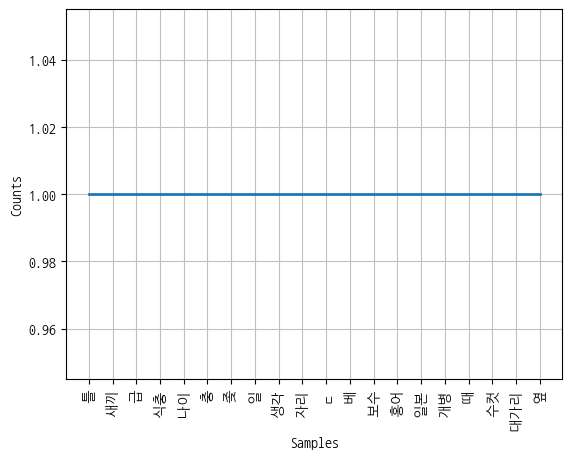

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
age_dist = FreqDist(reader.tagged_words(categories='연령'))
age_words = [w for (w, p) in age_dist if p in ['NNG', 'NNP']]
age_word_dist = FreqDist(age_words)
age_word_dist.plot(20)

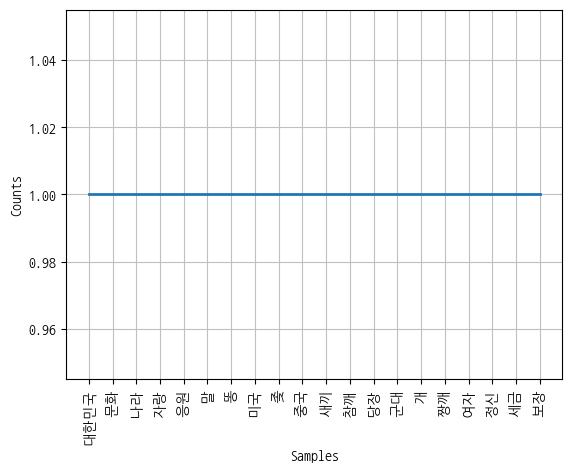

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
race_dist = FreqDist(reader.tagged_words(categories='인종_국적'))
race_words = [w for (w, p) in race_dist if p in ['NNG', 'NNP']]
race_word_dist = FreqDist(race_words)
race_word_dist.plot(20)

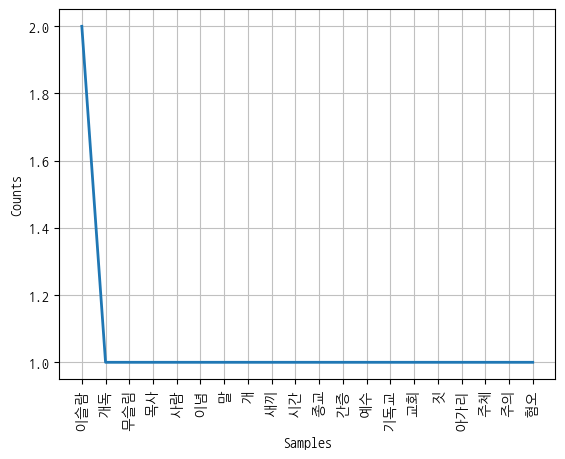

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
religion_dist = FreqDist(reader.tagged_words(categories='종교'))
religion_words = [w for (w, p) in religion_dist if p in ['NNG', 'NNP']]
religion_word_dist = FreqDist(religion_words)
religion_word_dist.plot(20)

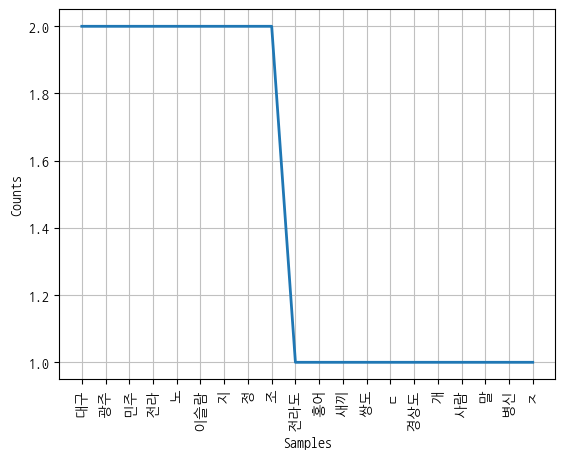

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
region_dist = FreqDist(reader.tagged_words(categories='지역'))
region_words = [w for (w, p) in region_dist if p in ['NNG', 'NNP']]
region_word_dist = FreqDist(region_words)
region_word_dist.plot(20)